# GaussQuality test example

This notebook demonstrates how GaussQuality can be used to estimate means, standard deviations, and weights of Gaussians from grey value distributions of $\mu$CT images.

In [1]:
# setup
import os
import sys

# import any other libraries you want

from gaussquality import gaussquality_io as gq_io
from gaussquality import gaussquality_fitting as gq_fit
from gaussquality import gaussquality_visuals as gq_vis
from gaussquality import gaussquality_calc as gq_calc

```GaussQuality``` functions have now been imported. To check that this has been successful and to check what each function does, run the following cell:

In [2]:
help(gq_io)

Help on module gaussquality.gaussquality_io in gaussquality:

NAME
    gaussquality.gaussquality_io - Gaussian mixture model fitting for greyscale images: IO

DESCRIPTION
    Created on Mon Jan 25 14:50:04 2021
    
    @author: elainehoml

FUNCTIONS
    get_img_filepath(img_dir, index)
        Gets filepath for a specific image in a sequence.
        
        Parameters
        ----------
        img_dir : str, path-like
            Path to folder containing single images.
        index : int
            Index of image
        
        Returns
        -------
        str, path-like
            Image filepath for index image in sequence
    
    get_img_list(img_dir)
        Gets list of .tiff images in an image sequence folder.
        
        Parameters
        ----------
        img_dir : str, path-like
            Path to folder containing single images.
        
        Returns
        -------
        list
            List of image filenames in the folder in ascending order. Only

---

# Demo: 2D image from 3D stack

This next section shows how a 2D image can be selected from a 3D stack and how a Gaussian mixture model (GMM) can be fitted to its grey value distribution.

## Step 1: Define directories

Define directories where the images are stored and results will be saved.


In [3]:
img_dir = os.path.join(os.getcwd(), "test", "example_images", "3D_")
results_dir = os.path.join(os.getcwd(), "test", "example_images", "test_results")


## Step 2: Load images



There are 50 slices in this stack.
The filepath to the central slice is C:\Users\emlh1n13\OneDrive - University of Southampton\Projects\Aim1\gaussqual\test\example_images\3D_\3D_25.tif.
The image with no cropping in x-y applied is:


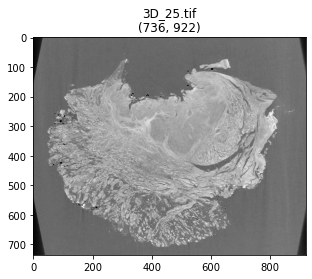

In [4]:
# get number of images in the 3D stack
total_nslices = gq_io.get_nslices(img_dir)
print("There are {} slices in this stack.".format(total_nslices))

# get the filepath to the central image in this sequence
filepath = gq_io.get_img_filepath(img_dir, int(total_nslices/2))
print("The filepath to the central slice is {}.".format(filepath))

# show the image
print("The image with no cropping in x-y applied is:")
img = gq_io.load_img(filepath, show_image=True)


The image with ```mask_percentage``` = 70% is shown below:


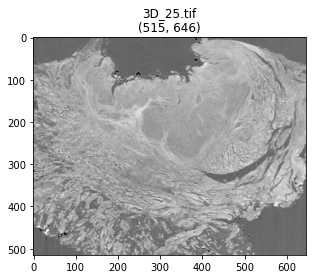

In [5]:
# to only consider the central mask_percentage % of the image in x-y:

print("The image with ```mask_percentage``` = 70% is shown below:")
img_crop = gq_io.load_img(filepath, show_image=True, mask_percentage=70)

## Step 3: Fit GMMs to this 2D image

Parameters required for 2D fitting are shown below:

|Parameter   |Name   |Description   |
|---|---|---|
|Number of Gaussian components   |```n_components```   |Number of Gaussian components to fit   |
|% masking in x-y plane   |```mask_percentage```   |Percentage of the image to use in x-y plane, this is a rectangle centrally placed in the image covering the required % of the entire image area (optional)  |
|Threshold   |```threshold```   |Only fit Gaussians to grey values within this threshold (optional)   |
|Material names   |```material_names```   |Names of materials to use in the figure legend in ascending order of means   |

Image grey value range = 50-250
Time elapsed in s: 3.756870746612549
Means = [107.67879618 164.27246036], Stdev = [ 5.58976109 24.36847805], Weights = [0.54811933 0.45188067]


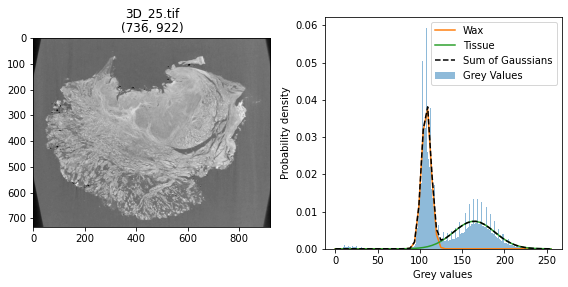

In [6]:
mu, sigma, phi = gq_fit.fit_GMM(img,
                                n_components=2,
                                threshold=(50,250))

gq_vis.plot_img_and_histo(filepath,
                          mask_percentage=100,
                          fitted_results=[mu, sigma, phi],
                          threshold=None,
                          material_names=["Wax", "Tissue"])

---

# Demo: Fit GMMs for 3D images

Parameters for GMM fitting are defined below:

|Parameter   |Name   |Description   |
|---|---|---|
|Number of slices   |```n_runs```   |Number of slices of 3D image to use   |
|Number of Gaussian components   |```n_components```   |Number of Gaussian components to fit   |
|% masking in x-y plane   |```mask_percentage```   |Percentage of the image to use in x-y plane, this is a rectangle centrally placed in the image covering the required % of the entire image area (optional)  |
|Threshold   |```threshold```   |Only fit Gaussians to grey values within this threshold (optional)   |
|% of z-stack to use   |```z_percentage```   |% of stack to use in the z-direction. ```n_slices``` number of slices will be considered from this central ```z_percentage``` of the image    |

This runner generates the stack results (average properties over the slices considered), and the slice_results (properties for each slice considered)

In [7]:
stack_results, slice_results = gq_fit.run_GMM_fit(img_dir,
                                                  n_components=2,
                                                  z_percentage=70,
                                                  n_runs=5,
                                                  mask_percentage=100,
                                                  threshold=(50,250))


Run 1, Slice 7
Image grey value range = 50-250
Time elapsed in s: 3.654982566833496
Means = [105.23020849 167.44185615], Stdev = [ 6.29147362 24.82085864], Weights = [0.53451469 0.46548531]

Run 2, Slice 15
Image grey value range = 50-250
Time elapsed in s: 3.643624782562256
Means = [106.01224863 165.90799771], Stdev = [ 5.736128   24.67872306], Weights = [0.52898193 0.47101807]

Run 3, Slice 24
Image grey value range = 50-250
Time elapsed in s: 3.579572916030884
Means = [107.38956203 164.49011665], Stdev = [ 5.58325375 24.1809451 ], Weights = [0.54624099 0.45375901]

Run 4, Slice 33
Image grey value range = 50-250
Time elapsed in s: 3.5694222450256348
Means = [108.6993152  164.01774396], Stdev = [ 5.58783388 24.13298273], Weights = [0.55410275 0.44589725]

Run 5, Slice 42
Image grey value range = 50-250
Time elapsed in s: 3.6577136516571045
Means = [110.79067285 164.41043814], Stdev = [ 5.56774615 24.30610316], Weights = [0.56633812 0.43366188]


## Visualisations

Showing the histogram and the image can be quite useful:

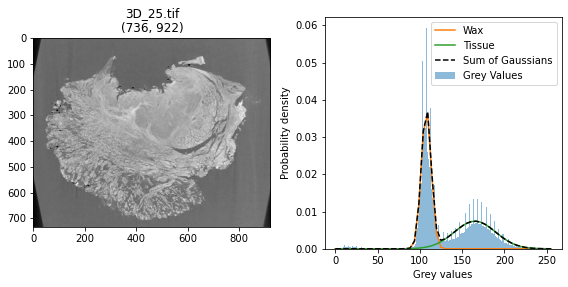

In [8]:
# change filepath to the desired slice number using the gq_io.get_img_filepath function
gq_vis.plot_img_and_histo(filepath,
                          mask_percentage=100,
                          fitted_results=stack_results,
                          threshold=None,
                          material_names=["Wax", "Tissue"])

Slice-by-slice properties can show 3D variations in the image

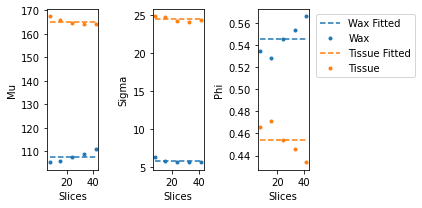

In [9]:
gq_vis.plot_slice_variation(stack_results, slice_results, material_names=["Wax", "Tissue"])